## Data Cleaning Drill 3 - Outliers

Use the dataset 'US Education' from previous exercise and make sure that missing values have been corrected for this exercise. 

1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5) Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import psycopg2
from sqlalchemy import create_engine
import warnings

In [2]:
#Connecting to Postgres database using sqlachemy
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
#Create a list called 'names' to fill in the missing values for revenues and students

names = ['ENROLL','TOTAL_REVENUE',                   
'FEDERAL_REVENUE',                 
'STATE_REVENUE',                   
'LOCAL_REVENUE',                   
'TOTAL_EXPENDITURE',              
'INSTRUCTION_EXPENDITURE',        
'SUPPORT_SERVICES_EXPENDITURE',    
'OTHER_EXPENDITURE',              
'CAPITAL_OUTLAY_EXPENDITURE',      
'GRADES_PK_G',                   
'GRADES_KG_G',                     
'GRADES_4_G',                      
'GRADES_8_G',                      
'GRADES_12_G',                     
'GRADES_1_8_G',                    
'GRADES_9_12_G',                   
'GRADES_ALL_G']

#Then iterate using for loop for each column to fill in NaN values

for name in names:
    education_df["{}".format(name)] = education_df.groupby(['YEAR'])["{}".format(name)]\
        .transform(lambda x: x.fillna(x.mean()))

In [4]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1385 non-null float64
TOTAL_REVENUE                   1441 non-null float64
FEDERAL_REVENUE                 1441 non-null float64
STATE_REVENUE                   1441 non-null float64
LOCAL_REVENUE                   1441 non-null float64
TOTAL_EXPENDITURE               1441 non-null float64
INSTRUCTION_EXPENDITURE         1441 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1441 non-null float64
OTHER_EXPENDITURE               1385 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1441 non-null float64
GRADES_PK_G                     1390 non-null float64
GRADES_KG_G                     1390 non-null float64
GRADES_4_G                      1390 non-null float64
GRADES_8_G                      1

In [5]:
#Check to see % of missing values from original .142
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.071716
TOTAL_REVENUE                   0.034182
FEDERAL_REVENUE                 0.034182
STATE_REVENUE                   0.034182
LOCAL_REVENUE                   0.034182
TOTAL_EXPENDITURE               0.034182
INSTRUCTION_EXPENDITURE         0.034182
SUPPORT_SERVICES_EXPENDITURE    0.034182
OTHER_EXPENDITURE               0.071716
CAPITAL_OUTLAY_EXPENDITURE      0.034182
GRADES_PK_G                     0.068365
GRADES_KG_G                     0.068365
GRADES_4_G                      0.068365
GRADES_8_G                      0.068365
GRADES_12_G                     0.068365
GRADES_1_8_G                    0.068365
GRADES_9_12_G                   0.068365
GRADES_ALL_G                    0.068365
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [6]:
#Now use interpolation to fill in missing remaining missing values
for name in names:
    education_df["{}".format(name)] = education_df["{}".format(name)]\
        .interpolate(method='nearest', limit_direction='backward')

In [7]:
#Check to see % of missing values from first pass at missing values of .03
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.054290
TOTAL_REVENUE                   0.030161
FEDERAL_REVENUE                 0.030161
STATE_REVENUE                   0.030161
LOCAL_REVENUE                   0.030161
TOTAL_EXPENDITURE               0.030161
INSTRUCTION_EXPENDITURE         0.030161
SUPPORT_SERVICES_EXPENDITURE    0.030161
OTHER_EXPENDITURE               0.054290
CAPITAL_OUTLAY_EXPENDITURE      0.030161
GRADES_PK_G                     0.030161
GRADES_KG_G                     0.030161
GRADES_4_G                      0.030161
GRADES_8_G                      0.030161
GRADES_12_G                     0.030161
GRADES_1_8_G                    0.030161
GRADES_9_12_G                   0.030161
GRADES_ALL_G                    0.030161
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [8]:
education_df.dropna(inplace=True)

In [9]:
#Check to see % of missing values from first pass at missing values of .03
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [10]:
#Create a new variable "Deficit" by subtracting TOTAL_EXPENDITURE from TOTAL_REVENUE

#Define 'Deficit' and add to dataframe
education_df['DEFICIT']=education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']

### 1) Look for Outliers in REVENUE fields

1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.



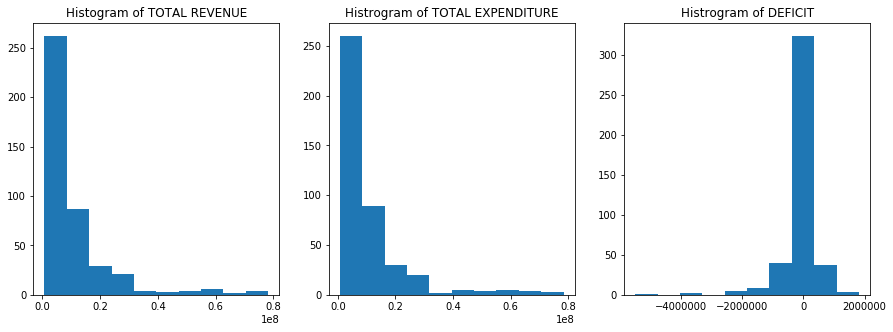

In [11]:
#historgram for TOTAL_REVENUE, TOTAL_EXPENDITURE & DEFICIT to visually detect outliers

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(education_df["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL REVENUE")

plt.subplot(1,3,2)
plt.hist(education_df["TOTAL_EXPENDITURE"])
plt.title("Histrogram of TOTAL EXPENDITURE")

plt.subplot(1,3,3)
plt.hist(education_df["DEFICIT"])
plt.title("Histrogram of DEFICIT")

plt.show()

Text(0.5, 1.0, 'Box Plot of DEFICIT')

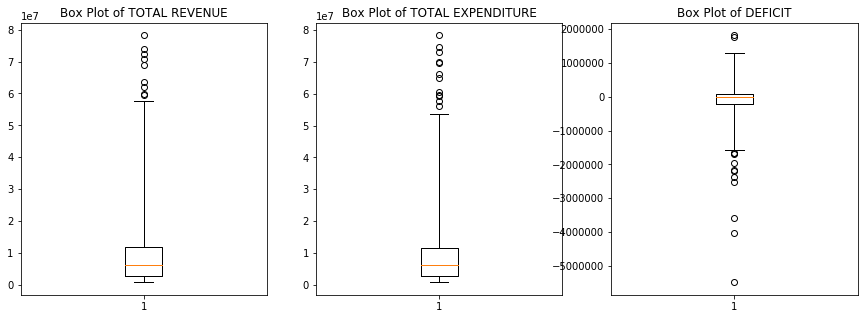

In [12]:
#historgram for TOTAL_REVENUE, TOTAL_EXPENDITURE & DEFICIT to visually detect outliers

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(education_df['TOTAL_REVENUE'], whis=5)
plt.title("Box Plot of TOTAL REVENUE")

plt.subplot(1,3,2)
plt.boxplot(education_df['TOTAL_EXPENDITURE'], whis=5)
plt.title("Box Plot of TOTAL EXPENDITURE")

plt.subplot(1,3,3)
plt.boxplot(education_df['DEFICIT'], whis=5)
plt.title("Box Plot of DEFICIT")

In [13]:
#Use z-score to statistically determine outliers in REVENUE
from scipy.stats import zscore

z_scores = zscore(education_df["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  28,  54,  63,  92, 103, 115, 143, 154, 166, 171, 175, 192,
       194, 200, 205, 217, 223, 227, 245, 247, 253, 258, 270, 275, 279,
       296, 298, 301, 304, 309, 323, 328, 332, 349, 351, 357, 362, 374,
       379, 383, 400, 402, 405, 408, 413]),)
Number of outliers is: 46
The score threshold is: 2
The indices of the outliers:
(array([ 28,  63,  92, 115, 143, 154, 166, 194, 205, 217, 247, 258, 270,
       298, 309, 323, 351, 362, 374, 402, 413]),)
Number of outliers is: 21
The score threshold is: 3
The indices of the outliers:
(array([ 63, 115, 166, 194, 217, 247, 270, 298, 309, 323, 351, 362, 374,
       402, 413]),)
Number of outliers is: 15
The score threshold is: 4
The indices of the outliers:
(array([166, 217, 270, 323, 374, 402]),)
Number of outliers is: 6


In [14]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education_df["TOTAL_REVENUE"] > max_val) 
                      | (education_df["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 54
The score threshold is: 1.5
Number of outliers is: 40
The score threshold is: 2.0
Number of outliers is: 24
The score threshold is: 2.5
Number of outliers is: 22
The score threshold is: 3.0
Number of outliers is: 19
The score threshold is: 3.5
Number of outliers is: 18
The score threshold is: 4.0
Number of outliers is: 15
The score threshold is: 4.5
Number of outliers is: 12


In [15]:
#Use z-score to statistically determine outliers in EXPENDITURE
from scipy.stats import zscore

z_scores = zscore(education_df["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  28,  54,  63,  92, 103, 115, 120, 143, 154, 166, 171, 192,
       194, 200, 205, 217, 223, 227, 245, 247, 253, 258, 270, 275, 279,
       296, 298, 304, 309, 323, 328, 332, 349, 351, 357, 362, 374, 379,
       383, 400, 402, 408, 413]),)
Number of outliers is: 44
The score threshold is: 2
The indices of the outliers:
(array([ 28,  63,  92, 103, 115, 143, 154, 166, 194, 205, 217, 247, 258,
       270, 298, 309, 323, 351, 362, 374, 402, 413]),)
Number of outliers is: 22
The score threshold is: 3
The indices of the outliers:
(array([ 63, 115, 166, 194, 217, 247, 258, 270, 298, 309, 323, 351, 362,
       374, 402, 413]),)
Number of outliers is: 16
The score threshold is: 4
The indices of the outliers:
(array([115, 166, 217, 270, 323, 374, 402]),)
Number of outliers is: 7


In [16]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education_df["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education_df["TOTAL_EXPENDITURE"] > max_val) 
                      | (education_df["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 57
The score threshold is: 1.5
Number of outliers is: 43
The score threshold is: 2.0
Number of outliers is: 28
The score threshold is: 2.5
Number of outliers is: 22
The score threshold is: 3.0
Number of outliers is: 21
The score threshold is: 3.5
Number of outliers is: 19
The score threshold is: 4.0
Number of outliers is: 16
The score threshold is: 4.5
Number of outliers is: 15


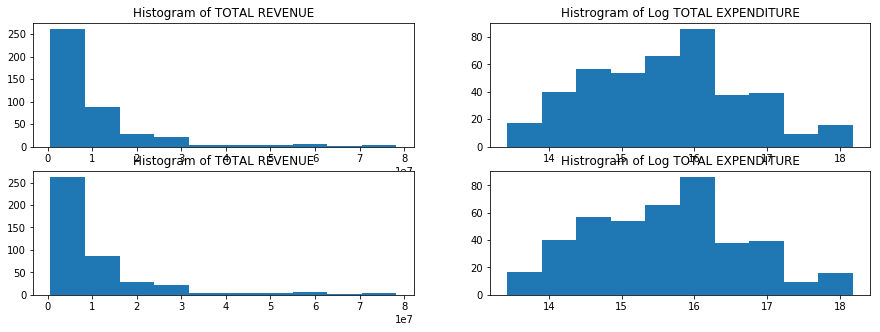

In [17]:
#box plot and historgram for TOTAL_REVENUE to visually see changes in outliers

plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
plt.hist(education_df["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL REVENUE")

plt.subplot(2,2,2)
plt.hist(np.log(education_df["TOTAL_EXPENDITURE"]))
plt.title("Histrogram of Log TOTAL EXPENDITURE")

plt.subplot(2,2,3)
plt.hist(education_df["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL REVENUE")

plt.subplot(2,2,4)
plt.hist(np.log(education_df["TOTAL_EXPENDITURE"]))
plt.title("Histrogram of Log TOTAL EXPENDITURE")

plt.show()

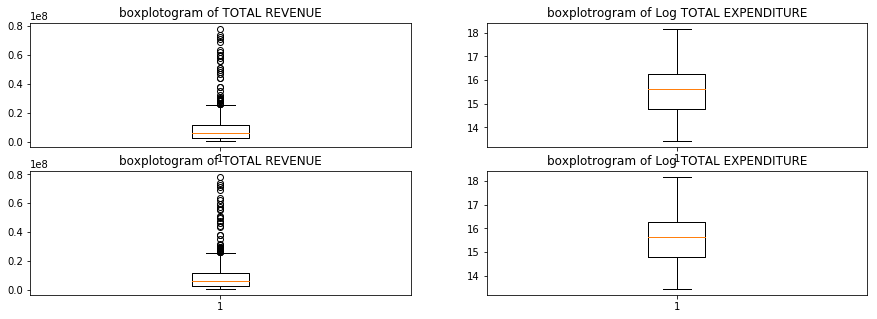

In [18]:
#box plot and boxplotorgram for TOTAL_EXPENDITURE to visually see changes in outliers

plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"])
plt.title("boxplotogram of TOTAL REVENUE")

plt.subplot(2,2,2)
plt.boxplot(np.log(education_df["TOTAL_EXPENDITURE"]))
plt.title("boxplotrogram of Log TOTAL EXPENDITURE")

plt.subplot(2,2,3)
plt.boxplot(education_df["TOTAL_REVENUE"])
plt.title("boxplotogram of TOTAL REVENUE")

plt.subplot(2,2,4)
plt.boxplot(np.log(education_df["TOTAL_EXPENDITURE"]))
plt.title("boxplotrogram of Log TOTAL EXPENDITURE")

plt.show()

In [19]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(np.log(education_df["TOTAL_REVENUE"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(education_df["TOTAL_REVENUE"]) > max_val) 
                      | (np.log(education_df["TOTAL_REVENUE"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 12
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [20]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(np.log(education_df["TOTAL_EXPENDITURE"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(education_df["TOTAL_EXPENDITURE"]) > max_val) 
                      | (np.log(education_df["TOTAL_EXPENDITURE"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 16
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [21]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_rev = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))
winsorized_exp = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))
winsorized_deficit = winsorize(education_df['DEFICIT'], (0.05, 0.05))

Text(0.5, 1.0, 'Box Plot of DEFICIT')

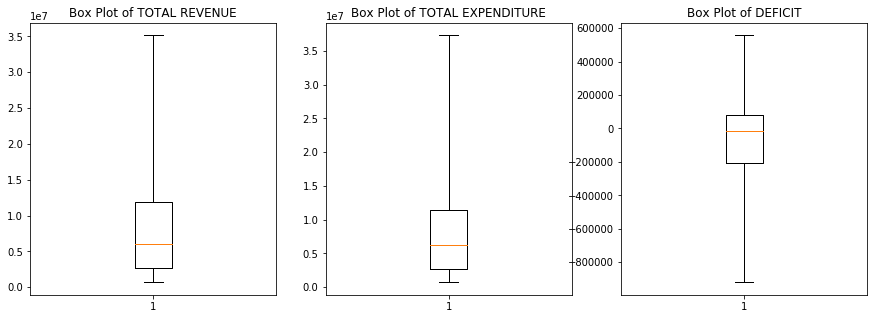

In [22]:
#historgram for winsorized TOTAL_REVENUE, TOTAL_EXPENDITURE & DEFICIT to visually detect outliers

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(winsorized_rev, whis=5)
plt.title("Box Plot of TOTAL REVENUE")

plt.subplot(1,3,2)
plt.boxplot(winsorized_exp, whis=5)
plt.title("Box Plot of TOTAL EXPENDITURE")

plt.subplot(1,3,3)
plt.boxplot(winsorized_deficit, whis=5)
plt.title("Box Plot of DEFICIT")

### 2) Create a new variable and eliminate outliers

3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [23]:
# For DEFICIT field need to remove outliers
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education_df["DEFICIT"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education_df["DEFICIT"] > max_val) 
                      | (education_df["DEFICIT"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 85
The score threshold is: 1.5
Number of outliers is: 64
The score threshold is: 2.0
Number of outliers is: 44
The score threshold is: 2.5
Number of outliers is: 33
The score threshold is: 3.0
Number of outliers is: 26
The score threshold is: 3.5
Number of outliers is: 19
The score threshold is: 4.0
Number of outliers is: 18
The score threshold is: 4.5
Number of outliers is: 15


In [24]:
# For DEFICIT field need to remove outliers
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(np.log(education_df["DEFICIT"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(education_df["DEFICIT"]) > max_val) 
                      | (np.log(education_df["DEFICIT"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


### 3) Using cleaned data (missing values & outliers) to create DEFICIT variable and run description stats

4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.





In [25]:
#Recalculate DEFICIT variable after adjusting outliers
deficit2 = winsorized_rev - winsorized_exp

Text(0.5, 1.0, 'Box Plot of DEFICIT')

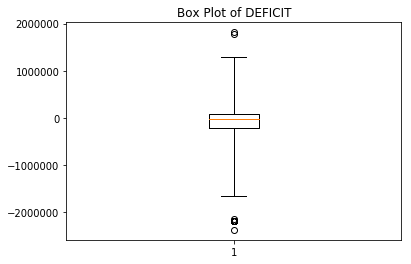

In [26]:
#Boxplot of new deficit using clean data
plt.boxplot(deficit2, whis=5)
plt.title("Box Plot of DEFICIT")

Text(0.5, 1.0, 'Box Plot of DEFICIT')

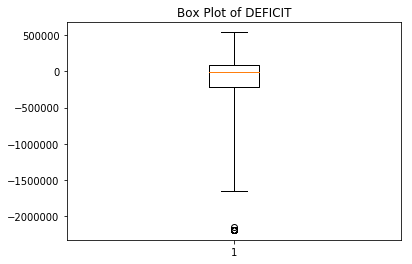

In [31]:
#Clean outliers in deficit2
winsorized_deficit2 = winsorize(deficit2, (0.05, 0.05))

#Boxplot of new deficit using clean data
plt.boxplot(winsorized_deficit2, whis=5)
plt.title("Box Plot of DEFICIT")

### Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?



In [32]:
pd.DataFrame({"original_deficit": education_df['DEFICIT'], "winsorized_deficit1": winsorized_deficit, 
              "winsorized_deficit2": winsorized_deficit2}).describe()

,original_deficit,winsorized_deficit1,winsorized_deficit2
count,4.220000e+02,422.000000,4.220000e+02
mean,-1.040443e+05,-70770.636093,-1.630347e+05
std,5.991442e+05,341017.550594,5.849519e+05
min,-5.487742e+06,-921134.000000,-2.190438e+06
25%,-2.047750e+05,-204775.000000,-2.148508e+05
50%,-1.434850e+04,-14348.500000,-1.522650e+04
75%,8.343175e+04,83431.750000,8.193475e+04
max,1.816932e+06,557170.000000,5.400550e+05


For the three iterations the impact of outliers changes the statistics drastically:

    1) The mean of the first variant is -70770 whereas the mean of the second variant is -16303.

    2) The median of the first variant is -14348.5 whereas the median of the second variant is -15226.5.

    3) The maximum of the first variant is 557170 whereas the maximum of the second variant is 540055.

The differences imply that chosing the outlier elimination strategy is very critical as it substantially affects the statistics of the variables!

### 6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?